In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Load both the datasets
grading_data = pd.read_excel("Data-NB.xlsx")
iris_data = pd.read_csv("iris.csv")

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


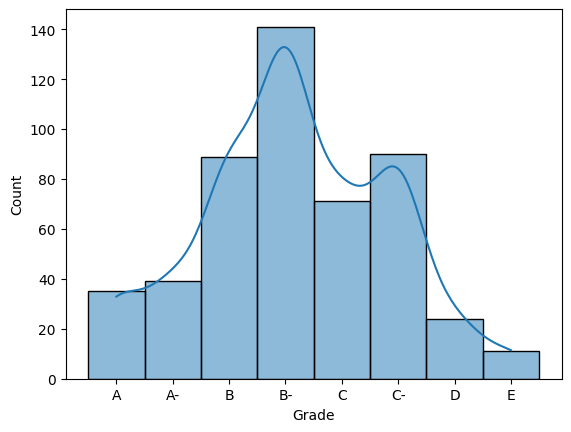

In [3]:
# Plot the data distribution (Gaussian distribution)
grading_data['Grade'] = pd.Categorical(grading_data['Grade'], categories=['A', 'A-', 'B', 'B-', 'C', 'C-', 'D', 'E'], ordered=True)

sns.histplot(grading_data, x='Grade', kde=True)
plt.show()

In [4]:
# Encoding the nominal variables of Grading dataset
grading_data['Gender'] = LabelEncoder().fit_transform(grading_data['Gender'])
grading_data['Attendance'] = LabelEncoder().fit_transform(grading_data['Attendance'])
grading_data['Grade'] = LabelEncoder().fit_transform(grading_data['Grade'])

In [5]:
# Split the Grading dataset into features and target variable
X_grading = grading_data.drop(columns=['Grade'])
y_grading = grading_data['Grade']

In [6]:
# Split the iris dataset into features and target variable
X_iris = iris_data.iloc[:, :4]  # All columns except the last one are features
y_iris = iris_data.iloc[:, 4]   # The last column is the target variable

In [7]:
# Split datasets into training and testing subsets 

# using 70-30 split for Grading dataset
X_train_grading, X_test_grading, y_train_grading, y_test_grading = train_test_split(X_grading, y_grading, test_size=0.3, random_state=49)

# using 80-20 split for iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=49)

In [8]:
# Train Gaussian Naive Bayes classifier for grading dataset
nb_grading = GaussianNB()
nb_grading.fit(X_train_grading, y_train_grading)

GaussianNB()

In [9]:
# Predict grades for grading test data
y_pred_grading = nb_grading.predict(X_test_grading)

In [10]:
# Calculate accuracy for grading dataset
accuracy_grading = accuracy_score(y_test_grading, y_pred_grading)
print("Accuracy for grading dataset (Gaussian Naive Bayes):", accuracy_grading)

# Calculate confusion matrix for grading dataset using Naive Bayes
conf_matrix_grading = confusion_matrix(y_test_grading, y_pred_grading)
print("Confusion Matrix for grading dataset using Gaussian Naive Bayes:\n", conf_matrix_grading)

Accuracy for grading dataset (Gaussian Naive Bayes): 0.7466666666666667
Confusion Matrix for grading dataset using Gaussian Naive Bayes:
 [[11  1  0  0  0  0  0  0]
 [ 1  4  5  0  0  0  0  0]
 [ 1  0 19  5  0  0  0  0]
 [ 0  0  5 41  2  0  0  0]
 [ 0  0  0  9  8  6  0  0]
 [ 0  0  0  0  2 20  1  0]
 [ 0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  3]]


In [11]:
# Train Random Forest classifier for grading dataset
rf_grading = RandomForestClassifier(random_state=49)
rf_grading.fit(X_train_grading, y_train_grading)

# Predict grades for grading test data using Random Forest
y_pred_rf_grading = rf_grading.predict(X_test_grading)

In [12]:
# Calculate accuracy for grading dataset using Random Forest
accuracy_rf_grading = accuracy_score(y_test_grading, y_pred_rf_grading)
print("Accuracy for grading dataset (Random Forest):", accuracy_rf_grading)

# Calculate confusion matrix for grading dataset using Random Forest
conf_matrix_rf_grading = confusion_matrix(y_test_grading, y_pred_rf_grading)
print("Confusion Matrix for grading dataset (Random Forest):\n", conf_matrix_rf_grading)

Accuracy for grading dataset (Random Forest): 0.86
Confusion Matrix for grading dataset (Random Forest):
 [[ 8  4  0  0  0  0  0  0]
 [ 1  6  3  0  0  0  0  0]
 [ 0  0 20  5  0  0  0  0]
 [ 0  0  2 45  1  0  0  0]
 [ 0  0  0  3 19  1  0  0]
 [ 0  0  0  0  1 22  0  0]
 [ 0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  3]]


In [13]:
# Train Gradient Boosted Trees classifier for grading dataset
gbt_grading = GradientBoostingClassifier(random_state=49)
gbt_grading.fit(X_train_grading, y_train_grading)

# Predict grades for grading test data using Gradient Boosted Trees
y_pred_gbt_grading = gbt_grading.predict(X_test_grading)

In [14]:
# Calculate accuracy for grading dataset using Gradient Boosted Trees
accuracy_gbt_grading = accuracy_score(y_test_grading, y_pred_gbt_grading)
print("Accuracy for grading dataset (Gradient Boosted Trees):", accuracy_gbt_grading)

# Calculate confusion matrix for grading dataset using Gradient Boosted Trees
conf_matrix_gbt_grading = confusion_matrix(y_test_grading, y_pred_gbt_grading)
print("Confusion Matrix for grading dataset (Gradient Boosted Trees):\n", conf_matrix_gbt_grading)

Accuracy for grading dataset (Gradient Boosted Trees): 0.8266666666666667
Confusion Matrix for grading dataset (Gradient Boosted Trees):
 [[ 8  4  0  0  0  0  0  0]
 [ 1  6  3  0  0  0  0  0]
 [ 0  1 19  5  0  0  0  0]
 [ 0  0  3 44  1  0  0  0]
 [ 0  0  0  4 17  2  0  0]
 [ 0  0  0  0  2 21  0  0]
 [ 0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  3]]


In [15]:
# Generate classification report for Naive Bayes classifier
print("Classification Report for Gaussian Naive Bayes (Grading Dataset):\n", classification_report(y_test_grading, y_pred_grading))

Classification Report for Gaussian Naive Bayes (Grading Dataset):
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.80      0.40      0.53        10
           2       0.66      0.76      0.70        25
           3       0.75      0.85      0.80        48
           4       0.67      0.35      0.46        23
           5       0.77      0.87      0.82        23
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         3

    accuracy                           0.75       150
   macro avg       0.79      0.77      0.76       150
weighted avg       0.74      0.75      0.73       150



In [16]:
# Generate classification report for Random Forest classifier
print("Classification Report for Random Forest (Grading Dataset):\n", classification_report(y_test_grading, y_pred_rf_grading))

Classification Report for Random Forest (Grading Dataset):
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.60      0.60      0.60        10
           2       0.80      0.80      0.80        25
           3       0.85      0.94      0.89        48
           4       0.90      0.83      0.86        23
           5       0.96      0.96      0.96        23
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         3

    accuracy                           0.86       150
   macro avg       0.87      0.85      0.86       150
weighted avg       0.86      0.86      0.86       150



In [17]:
# Generate classification report for Gradient Boosted Trees classifier
print("Classification Report for Gradient Boosted Trees (Grading Dataset):\n", classification_report(y_test_grading, y_pred_gbt_grading))

Classification Report for Gradient Boosted Trees (Grading Dataset):
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.55      0.60      0.57        10
           2       0.76      0.76      0.76        25
           3       0.83      0.92      0.87        48
           4       0.85      0.74      0.79        23
           5       0.91      0.91      0.91        23
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         3

    accuracy                           0.83       150
   macro avg       0.85      0.82      0.83       150
weighted avg       0.83      0.83      0.83       150



Comparing the performance of the Naive Bayes classifier with Random Forest and Gradient Boosted Trees (GBT) based on their accuracy metrics reveals several key points:

Accuracy Scores: 
    Naive Bayes: 75%, 
    Random Forest: 86%, 
    Gradient Boosted Trees: 83%

The considerably higher accuracy obtained using Random Forest (RF) and Gradient Boosted Trees (GBT) compared to Naive Bayes (NB) in this case could be attributed to several factors:

1. Complexity of Relationships between Features:
    - RF and GBT can capture complex relationships between features due to their ensemble nature and ability to construct multiple decision trees. They are capable of learning intricate patterns and interactions in the data that Naive Bayes, with its assumption of feature independence, might miss. In scenarios where features are not completely independent, as assumed by Naive Bayes, RF and GBT can offer superior performance.

2. Handling of Non-Linear Relationships:
    - RF and GBT are better equipped to handle non-linear relationships between features and the target variable. They can partition the feature space into regions where the target variable exhibits different behaviors, leading to improved predictive accuracy, especially when the underlying data distribution is complex.

3. Robustness to Noisy Data:
    - RF and GBT are typically more robust to noisy data compared to Naive Bayes. Noisy or irrelevant features may not significantly impact the performance of RF and GBT due to their ensemble nature, whereas Naive Bayes may be more sensitive to such noise, affecting its classification decisions.

4. Model Flexibility:
    - GBT, in particular, can adapt its model complexity during training by sequentially adding weak learners (decision trees) to correct the errors made by previous learners. This adaptability allows GBT to focus more on difficult-to-classify instances, potentially improving accuracy.
    - RF also benefits from model averaging and feature randomization, which can lead to improved generalization performance compared to Naive Bayes.

5. Imbalance in Class Distribution:
    - If the dataset contains imbalanced class distributions, RF and GBT may handle this more effectively than Naive Bayes. Ensemble methods like RF and GBT can mitigate the impact of class imbalance by adjusting the decision boundaries and placing more emphasis on minority classes during training.

6. Hyperparameter Tuning:
    - RF and GBT often require tuning of hyperparameters such as the number of trees, tree depth, learning rate, etc. Proper tuning of these parameters can significantly improve performance. In contrast, Naive Bayes has fewer hyperparameters to tune, which may limit its ability to adapt to the dataset.

In summary, the considerably higher accuracy achieved using RF and GBT compared to Naive Bayes in this case is likely due to their ability to capture complex relationships, handle non-linearities, and adapt to noisy or imbalanced data more effectively. These algorithms offer greater flexibility and robustness, especially in scenarios where the assumptions of Naive Bayes are violated or where the underlying data distribution is complex.

Also, the choice between Naive Bayes, Random Forest, and Gradient Boosted Trees depends on various factors such as the dataset characteristics, computational resources, interpretability requirements, and performance goals. Each algorithm has its strengths and weaknesses, and the best choice often depends on the specific problem at hand.

In [18]:
# Train Gaussian Naive Bayes classifier for iris dataset
nb_iris = GaussianNB()
nb_iris.fit(X_train_iris, y_train_iris)

# Predict flower species for iris test data
y_pred_iris = nb_iris.predict(X_test_iris)

In [19]:
# Calculate accuracy for iris dataset
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print("Accuracy for iris dataset using Naive Bayes:", accuracy_iris)

# Plot classification report for iris dataset
print("Classification Report for Gaussian Naive Bayes (iris dataset):\n", classification_report(y_test_iris, y_pred_iris))

Accuracy for iris dataset using Naive Bayes: 0.9333333333333333
Classification Report for Gaussian Naive Bayes (iris dataset):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



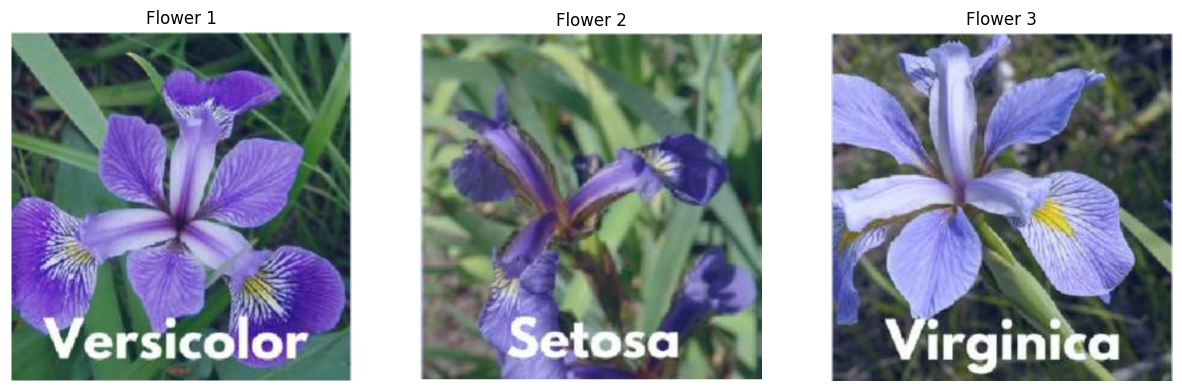

In [20]:
# Load images of the flowers
flower1 = mpimg.imread('Versicolor.jpg')
flower2 = mpimg.imread('Setosa.jpg')
flower3 = mpimg.imread('Virginica.jpg')

# Plot the flowers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot flower1
axes[0].imshow(flower1)
axes[0].set_title('Flower 1')

# Plot flower2
axes[1].imshow(flower2)
axes[1].set_title('Flower 2')

# Plot flower3
axes[2].imshow(flower3)
axes[2].set_title('Flower 3')

# Hide axis labels
for ax in axes:
    ax.axis('off')

plt.show()

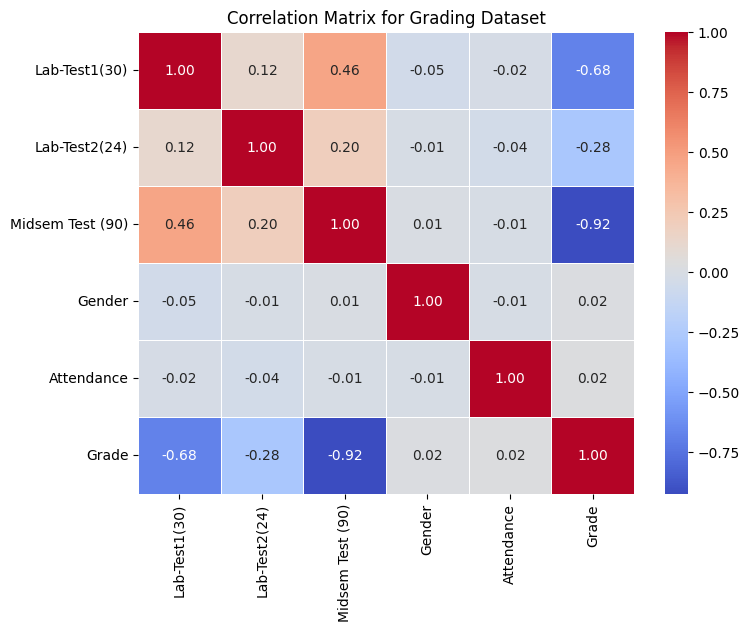

In [21]:
# Visualization: Correlation matrix for Grading dataset

plt.figure(figsize=(8, 6))
sns.heatmap(grading_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Grading Dataset')
plt.show()

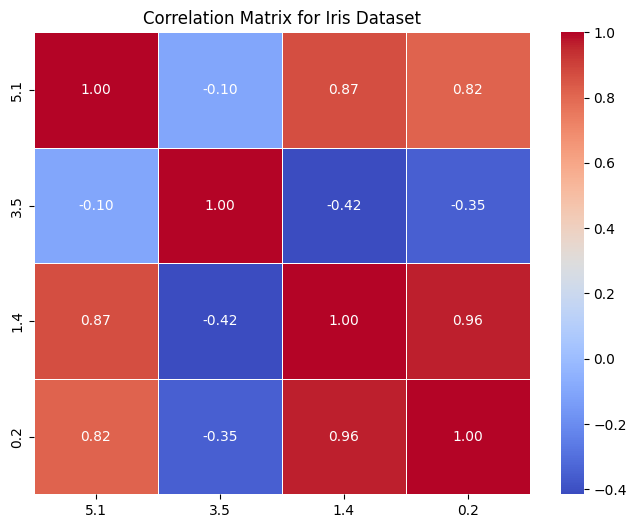

In [22]:
# Visualization: Correlation matrix for iris dataset

# Exclude non-numeric columns before computing correlation matrix for iris dataset
iris_numeric = iris_data.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(iris_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Iris Dataset')
plt.show()

To verify the assumptions of the Naive Bayes algorithm, we need to assess whether the features are conditionally independent given the class label. One common way to do this is by examining the correlation matrix. Since Naive Bayes assumes independence among features, we expect to see low correlations between the features.

After plotting the correlation matrices for both datasets, we should analyze the correlation values between features. If the correlation values are close to zero or very low, it would support the assumption of feature independence for Naive Bayes. Conversely, if there are significant correlations between features, it would indicate violations of the Naive Bayes assumption, suggesting that the algorithm may not perform optimally giving less accuracy. This is the general idea.

But this case we have here seems like an exception from this idea. As here, we got higher accuracy when using Naive Bayes algorithm on iris dataset than when it is used on grading dataset though we can clearly see from the two correlation matrices that the correlation values are relatively higher in iris dataset than in grading dataset. This may be because of multiple reasons, but the best one we could think of is as follows:
iris dataset is a much simpler dataset compared to the grading dataset (iris dataset has 4 feature variables while grading dataset has 5 and iris dataset has 3 classes in the target variable while grading dataset has 8). This may have led to us getting higher accuracy when using Naive Bayes algorithm on iris dataset than when it is used on grading dataset.